# Data Preparation

## Package Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Importing and Pre-Processing Data

In [2]:
#Importing data
all_data = pd.read_excel(r'Regression_Analysis_Sheet_(With Imputation_Tradewar).xlsx')

#Combining columns to reduce categories
all_data['Communications'] = all_data['Communications'] + all_data['Communication Services']
all_data.drop('Communication Services', axis=1, inplace=True)

all_data['Consumer'] = (all_data['Consumer Discretionary'] +
                        all_data['Consumer, Cyclical'] +
                        all_data['Consumer, Cyclical, Financial, Industrial'] +
                        all_data['Consumer, Non-cyclical'] +
                        all_data['Consumer, Non-cyclical, Industrial']
                       )

all_data.drop(['Consumer Discretionary',
               'Consumer, Cyclical',
               'Consumer, Cyclical, Financial, Industrial', 
               'Consumer, Non-cyclical',
               'Consumer, Non-cyclical, Industrial'],
               axis=1,
               inplace=True)

all_data['Industrials'] = all_data['Industrials'] + all_data['Industrial']
all_data.drop('Industrial', axis=1, inplace=True)

all_data['Technology'] = all_data['Technology'] + all_data['Information Technology']
all_data.drop('Information Technology', axis=1, inplace=True)

all_data['Financial'] = all_data['Financial'] + all_data['Financials']
all_data.drop('Financials', axis=1, inplace=True)

all_data['Materials'] = all_data['Materials'] + all_data['Material']
all_data.drop('Material', axis=1, inplace=True)

all_data['Energy and Utilities'] = all_data['Energy'] + all_data['Utilities']
all_data.drop(['Energy', 'Utilities'], axis=1, inplace=True)

## Plotting Correlation Matrix to Aid in Feature Selection

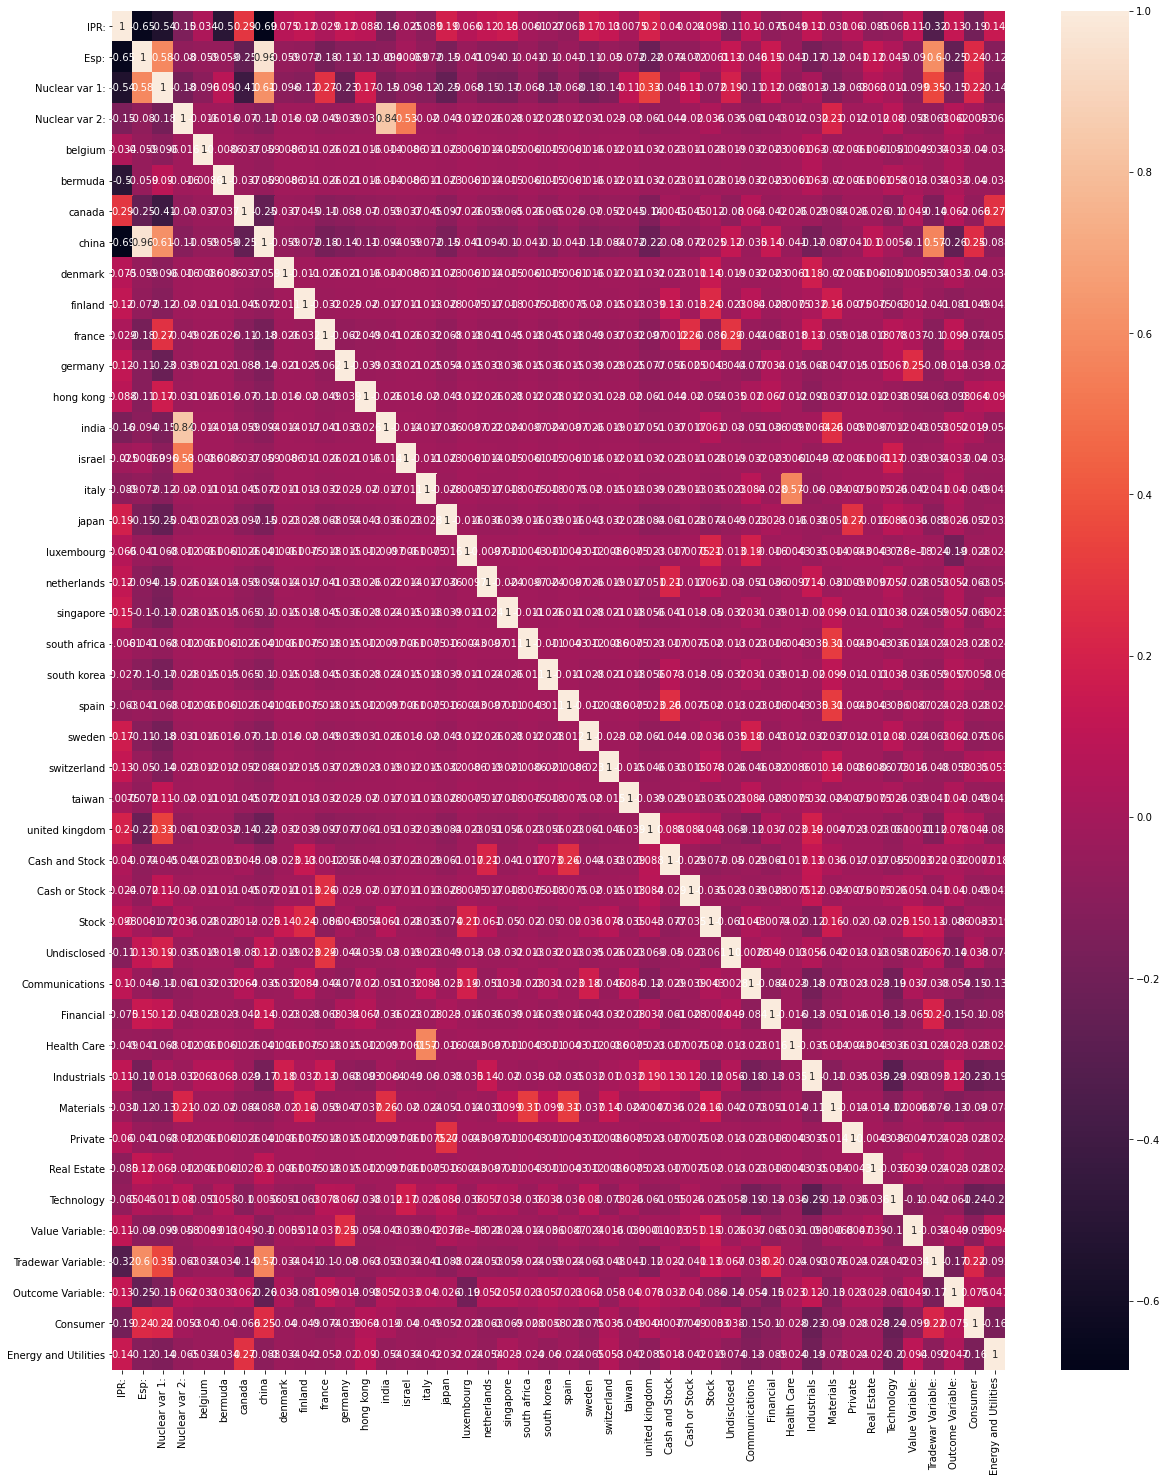

In [3]:
corr_matrix = all_data.corr()
plt.figure().set_size_inches(20,25)
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Dropping Features Weakly Correlated to Outcome

In [4]:
all_data.drop(['Nuclear var 2:', 
               'Communications', 
               'Health Care', 'Private', 
               'Real Estate', 
               'Technology', 
               'Consumer', 
               'Energy and Utilities', 
               'Value Variable:', 
               'Cash and Stock', 
               'Cash or Stock', 
               'Stock'],
               axis=1, 
               inplace=True)

## Splitting Data

In [5]:
X = all_data.drop('Outcome Variable:', axis=1)
Y = all_data['Outcome Variable:']

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=7,
                                                    stratify = Y)

## Scaling Data

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns = X.columns)

x_test = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test, columns = X.columns)

full_col_names = list(x_train.columns.values)

# Model Fitting and Tuning

## Grid Search for Optimal C Value

In [16]:
# Testing different C (inverse of regularization penalty) values to control overfitting and get most useful model
C_values = [0.01, 0.1, 1, 10, 100, 1000]
C_grid = {'C': C_values}
n_folds = 6

logReg = LogisticRegression(solver='saga',
                            penalty='l1',
                            random_state=7,
                            max_iter=10000,
                            class_weight={0:9,1:1})

grid_logReg = GridSearchCV(logReg,
                           C_grid,
                           cv = n_folds,
                           refit = True)

grid_logReg.fit(x_train, y_train)

best_logReg = grid_logReg.best_estimator_
print(best_logReg) # Print the parameters which led to the best model result

C:\Users\Michael\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Michael\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Michael\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Michael\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Michael\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached 

LogisticRegression(C=1, class_weight={0: 9, 1: 1}, max_iter=10000, penalty='l1',
                   random_state=7, solver='saga')


C:\Users\Michael\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## Plotting Accuracy Over C Values

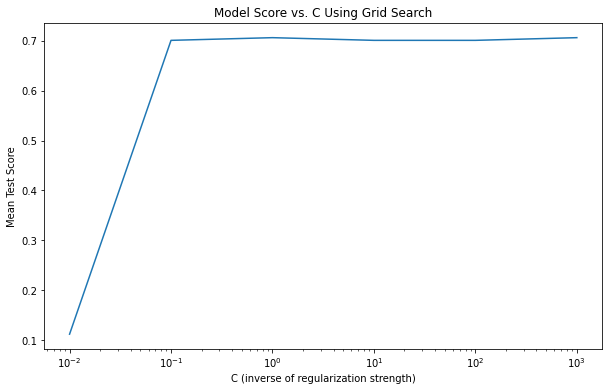

In [17]:
plt.figure().set_size_inches(10,6)
fg2 = plt.semilogx(C_values, grid_logReg.cv_results_['mean_test_score'])
plt.title('Model Score vs. C Using Grid Search')
plt.xlabel('C (inverse of regularization strength)')
plt.ylabel('Mean Test Score')
plt.show()

## Selecting Optimal C and Running Model on Test Data

In [9]:
best_logReg = grid_logReg.best_estimator_
y_pred = best_logReg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
score = best_logReg.score(x_test, y_test)

# Model Results

## Results with Test Data

Optimal Model Performance with Test Data:

0.7659574468085106
[[ 3  2]
 [ 9 33]]


Text(0.5, 1.0, 'Accuracy Score: 0.7659574468085106')

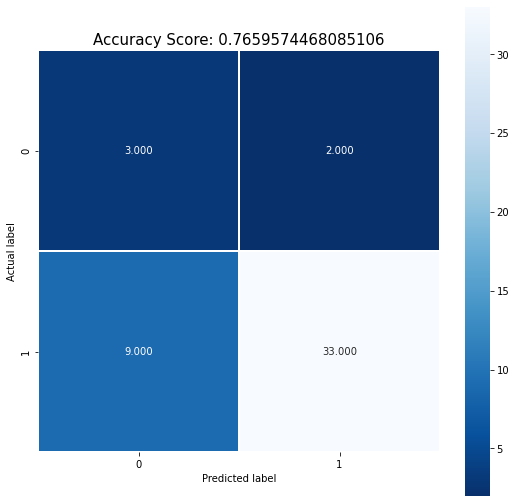

In [10]:
print('Optimal Model Performance with Test Data:\n')
print(score)
print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

## Results with Training Data

In [11]:
y_pred_train = best_logReg.predict(x_train)
cm_train = confusion_matrix(y_train, y_pred_train)
score_train = best_logReg.score(x_train, y_train)

Optimal Model Performance with Train Data:

0.7486631016042781
[[ 20   1]
 [ 46 120]]


Text(0.5, 1.0, 'Accuracy Score: 0.7486631016042781')

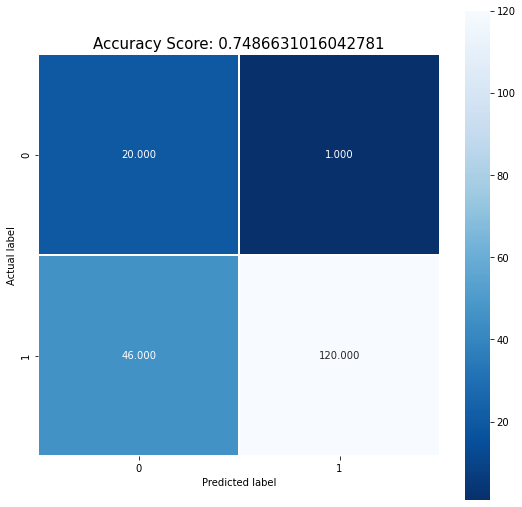

In [12]:
print('Optimal Model Performance with Train Data:\n')
print(score_train)
print(cm_train)

plt.figure(figsize=(9,9))
sns.heatmap(cm_train, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_train)
plt.title(all_sample_title, size = 15)

## Coefficients

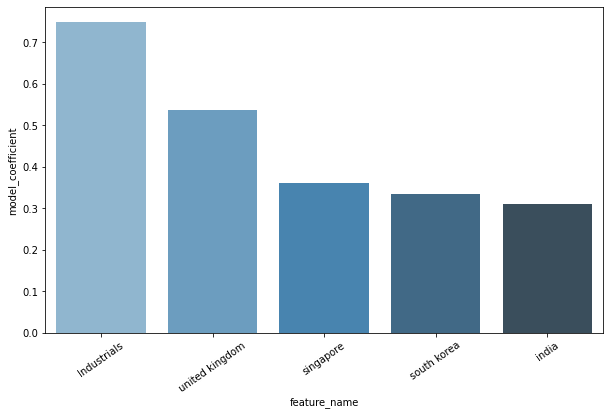

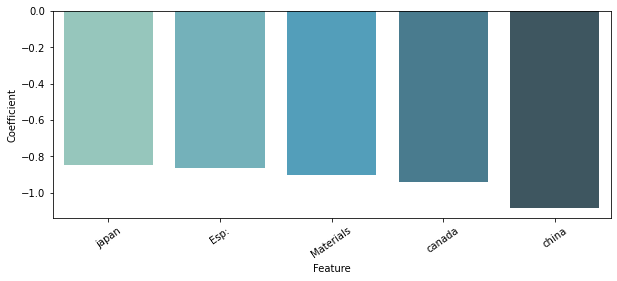

In [13]:
# Getting the models coefficients (and top 5 and bottom 5)
logReg_coeff = pd.DataFrame({'feature_name': full_col_names, 'model_coefficient': best_logReg.coef_.transpose().flatten()})
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False)
logReg_coeff_top = logReg_coeff.head(5)
logReg_coeff_bottom = logReg_coeff.tail(5)

# Plotting top 5 coefficients
plt.figure().set_size_inches(10, 6)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_top, palette="Blues_d")
fg3.set_xticklabels(rotation=35, labels=logReg_coeff_top.feature_name)

# Plotting bottom 5 coefficients
plt.figure().set_size_inches(10,6)
fg4 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_bottom, palette="GnBu_d")
fg4.set_xticklabels(rotation=35, labels=logReg_coeff_bottom.feature_name)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.subplots_adjust(bottom=0.4)


# Using Model to Predict Transaction Outcomes

## Importing Experimental Columns

In [43]:
experimental_data = pd.read_excel(r'Experimental_Transactions_for_Logistic_(Tradewar_Update).xlsx')
experimental_data = experimental_data[X.columns]

## Computing and Printing Outcome from Experimental Transactions

In [44]:
experimental_outcomes = best_logReg.predict(experimental_data)

#Original Chinese Transaction (blocked in real life)
print('1. Fake transaction with China as acquiring country. Predicted outcome: ', 
      experimental_outcomes[0])

#Same transaction, but China has IPR, Esp, and Nuclear variables of Canada
print('2. Same transaction, but China has IPR, Esp, and Nuclear variables of Canada. Predicted outcome: ', 
      experimental_outcomes[1])

#Same transaction, but country is Canada instead of China and Canada has China's IPR, Esp, and Nuclear variables
print('3. Same transaction, but country is Canada instead of China and Canada has China IPR, Esp,\
and Nuclear variables. Predicted outcome: ', 
      experimental_outcomes[2])

#Same transaction, but country is Canada and Canada has its own IPR, Esp, and Nuclear variables
print('4. Same transaction, but country is Canada and Canada has its own IPR, Esp, and Nuclear variables.\
 Predicted outcome: ', 
      experimental_outcomes[3])

#Same as 2, but trade war variable is 1
print('5. Same as 2., but trade war variable is active (1): ', 
      experimental_outcomes[4])

#Same as 4, but trade war variable is 1
print('6. Same as 4., but trade war variable is active (1): ', 
      experimental_outcomes[5])

#Same transaction, but country is United Kingdom instead of China and UK has China's IPR, Esp, and Nuclear variables.
#Trade war variable is 0.
print('7. Same as original Chinese transaction, but country is UK instead of China and UK has China IPR, Esp,\
and Nuclear variables: ', 
      experimental_outcomes[6])

#Same as 7., but trade war variable is 1
print('8. Same as 7., but trade war variable is active (1): ', 
      experimental_outcomes[7])

1. Original Chinese Transaction (failed in real life). Predicted outcome:  0
2. Same transaction, but China has IPR, Esp, and Nuclear variables of Canada. Predicted outcome:  1
3. Same transaction, but country is Canada instead of China and Canada has China IPR, Esp,and Nuclear variables. Predicted outcome:  0
4. Same transaction, but country is Canada and Canada has its own IPR, Esp, and Nuclear variables. Predicted outcome:  1
5. Same as 2., but trade war variable is active (1):  1
6. Same as 4., but trade war variable is active (1):  1
7. Same as original Chinese transaction, but country is UK instead of China and UK has China IPR, Esp,and Nuclear variables:  1
8. Same as 7., but trade war variable is active (1):  1


## Clean Output for Experimental Output Table

In [52]:
experimental_data = pd.read_excel(r'Experimental_Transactions_for_Logistic_(Tradewar_Update, Table Filler).xlsx')
experimental_data = experimental_data[X.columns]
experimental_outcomes = best_logReg.predict(experimental_data)

print('China: ', 
      experimental_outcomes[0])

print('China w/ Canadas IPR, Esp, and Nuc.: ', 
      experimental_outcomes[1])

print('Canada w/ Chinas IPR, Esp, and Nuc: ', 
      experimental_outcomes[2])

print('Canada: ', 
      experimental_outcomes[3])

print('China w/ Canadas IPR, Esp, and Nuc.; Trade War Active: ', 
      experimental_outcomes[4])

print('Canada; Trade War Active: ', 
      experimental_outcomes[5])

print('UK w/ Chinas IPR, Esp, and Nuc.: ', 
      experimental_outcomes[6])

print('UK w. Chinas IPR, Esp, and Nuc.; Trade War Active: ', 
      experimental_outcomes[7])

print('UK: ', 
      experimental_outcomes[8])

print('India w/ Trade War Active: ', 
      experimental_outcomes[9])

print('India w/ Chinas IPR, ESP, and Nuc.: ', 
      experimental_outcomes[10])

print('Italy: ', 
      experimental_outcomes[11])

print('Italy w/ Canadas IPR, Esp, and Nuc.: ', 
      experimental_outcomes[12])

print('Italy w/ Chinas IPR, Esp, and Nuc.: ', 
      experimental_outcomes[13])


China:  0
China w/ Canadas IPR, Esp, and Nuc.:  1
Canada w/ Chinas IPR, Esp, and Nuc:  0
Canada:  1
China w/ Canadas IPR, Esp, and Nuc.; Trade War Active:  1
Canada; Trade War Active:  1
UK w/ Chinas IPR, Esp, and Nuc.:  1
UK w. Chinas IPR, Esp, and Nuc.; Trade War Active:  1
UK:  1
India w/ Trade War Active:  1
India w/ Chinas IPR, ESP, and Nuc.:  1
Italy:  1
Italy w/ Canadas IPR, Esp, and Nuc.:  1
Italy w/ Chinas IPR, Esp, and Nuc.:  1
